In [3]:
import pandas as pd
import numpy as np

# Load the RNA-seq data
rnaseq_df = pd.read_csv('/Users/leojo/Developer/alexandrov_sd_proj/prelim_analysis/data/tcga.brca.rnaseq.unstranded.fpkm.counts.matrix.txt', sep='\t', index_col=0)

# Load the HRD score data
hrd_df = pd.read_excel('/Users/leojo/Developer/alexandrov_sd_proj/prelim_analysis/data/tcga.hrdscore.xlsx')

# Load the BRCA status data
brca_df = pd.read_csv('/Users/leojo/Developer/alexandrov_sd_proj/prelim_analysis/data/toga.breast.brca.status.txt', sep='\t', index_col=0)

# Take the first 25 rows
rnaseq_sample = rnaseq_df.head(25)
hrd_sample = hrd_df.head(25)
brca_sample = brca_df.head(25)

# Create a 'data/sample' directory if it doesn't exist
import os
os.makedirs("data/sample", exist_ok=True)

# Save the samples as TSV files
rnaseq_sample.to_csv("data/sample/rnaseq_sample.csv", index=True)
hrd_sample.to_csv("data/sample/hrd_sample.csv", index=True)
brca_sample.to_csv("data/sample/brca_sample.csv", index=True)

print("Sample data has been saved in TSV format in the 'data/sample' directory.")

# Display the first few rows of each sample
print("\nRNA-seq sample:")
print(rnaseq_sample.head())

print("\nHRD score sample:")
print(hrd_sample.head())

print("\nBRCA status sample:")
print(brca_sample.head())

Sample data has been saved in TSV format in the 'data/sample' directory.

RNA-seq sample:
        Case ID         Sample ID          Sample Type  \
0  TCGA-E9-A1RH  TCGA-E9-A1RH-01A        Primary Tumor   
1  TCGA-C8-A26W  TCGA-C8-A26W-01A        Primary Tumor   
2  TCGA-E9-A1RH  TCGA-E9-A1RH-11A  Solid Tissue Normal   
3  TCGA-AO-A0JJ  TCGA-AO-A0JJ-01A        Primary Tumor   
4  TCGA-BH-A0HO  TCGA-BH-A0HO-01A        Primary Tumor   

   ENSG00000000003.15|TSPAN6|protein_coding  \
0                                    1.0276   
1                                   13.2684   
2                                   12.8007   
3                                   14.8681   
4                                    0.8430   

   ENSG00000000005.6|TNMD|protein_coding  \
0                                 0.0000   
1                                 0.1250   
2                                 8.4777   
3                                 2.2172   
4                                 0.0798   

   ENSG000000

In [10]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Jupyter Notebook magic command for inline plotting
%matplotlib inline


# Read the HRD sample data
hrd_data = pd.read_excel('/Users/leojo/Developer/alexandrov_sd_proj/prelim_analysis/data/tcga.hrdscore.xlsx')


# Display the first few rows of the dataset
print(hrd_data.head())


         sample  HRD  Telomeric AI  LST  HRD-sum
0  TCGA-02-0001    5             6    8       19
1  TCGA-02-0003    1             3    4        8
2  TCGA-02-0006    0             2    8       10
3  TCGA-02-0007    8             6    4       18
4  TCGA-02-0009    1             4    2        7


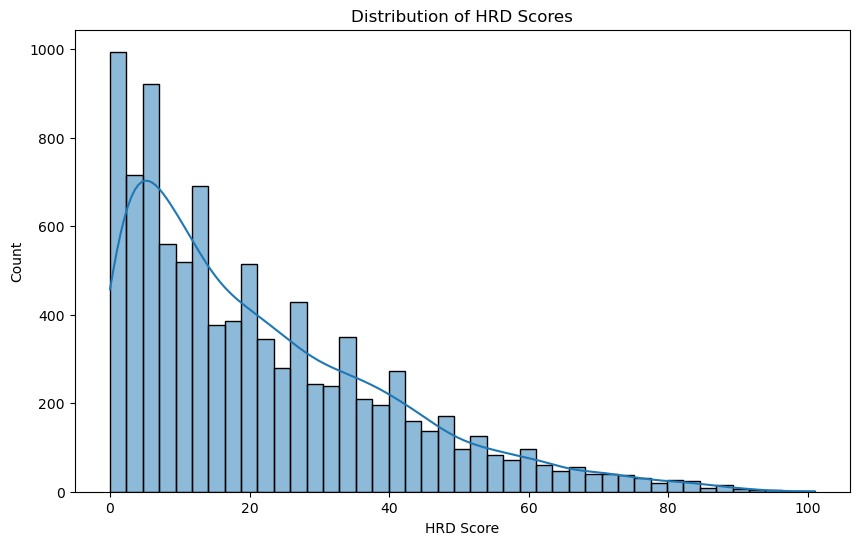

In [11]:

# 1. Distribution of HRD scores
plt.figure(figsize=(10, 6))
sns.histplot(data=hrd_data, x='HRD-sum', kde=True)
plt.title('Distribution of HRD Scores')
plt.xlabel('HRD Score')
plt.ylabel('Count')
plt.show()


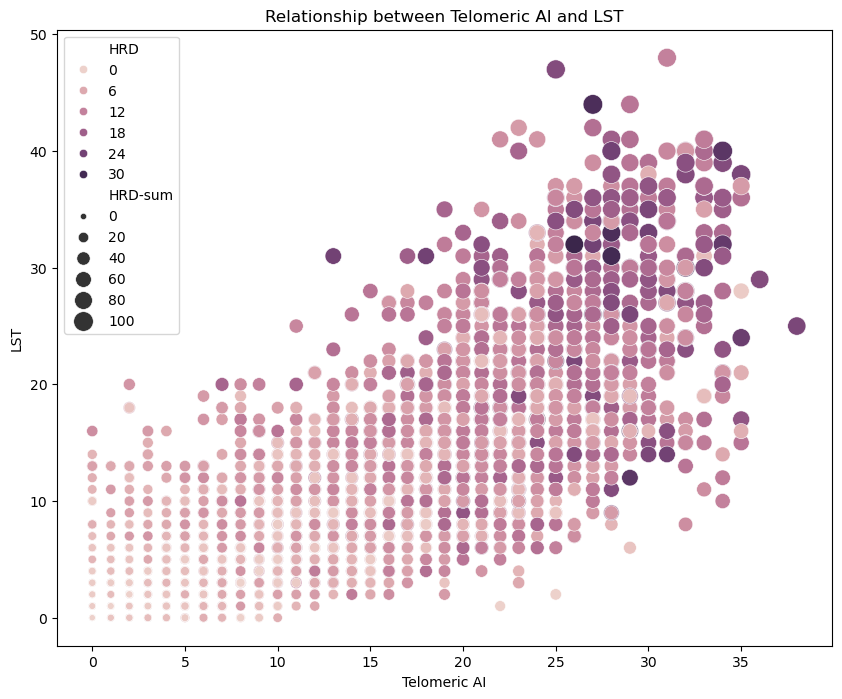

In [12]:

# 2. Scatter plot of HRD components
plt.figure(figsize=(10, 8))
sns.scatterplot(data=hrd_data, x='Telomeric AI', y='LST', hue='HRD', size='HRD-sum', sizes=(20, 200))
plt.title('Relationship between Telomeric AI and LST')
plt.xlabel('Telomeric AI')
plt.ylabel('LST')
plt.show()


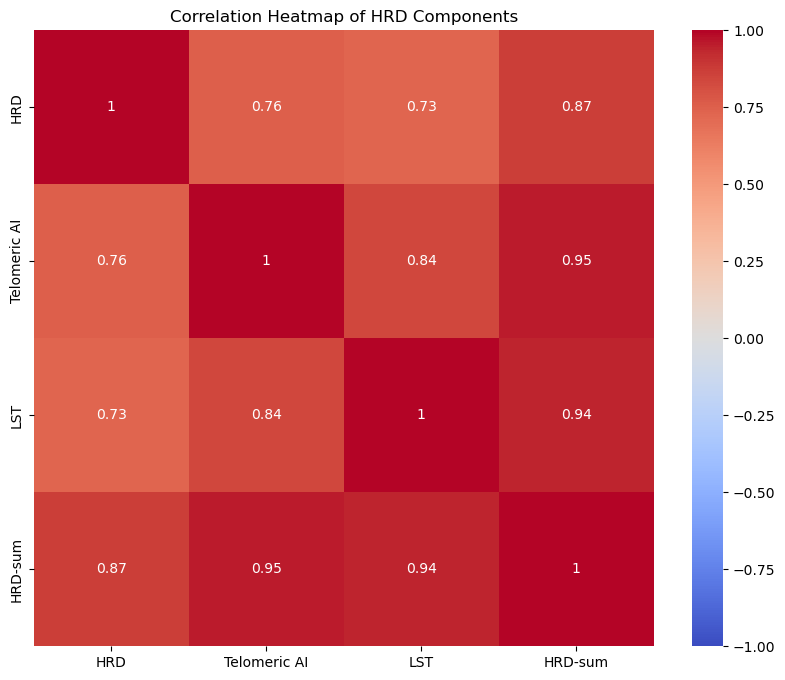

In [13]:

# 3. Heatmap of correlations between HRD components
hrd_components = ['HRD', 'Telomeric AI', 'LST', 'HRD-sum']
correlation_matrix = hrd_data[hrd_components].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of HRD Components')
plt.show()


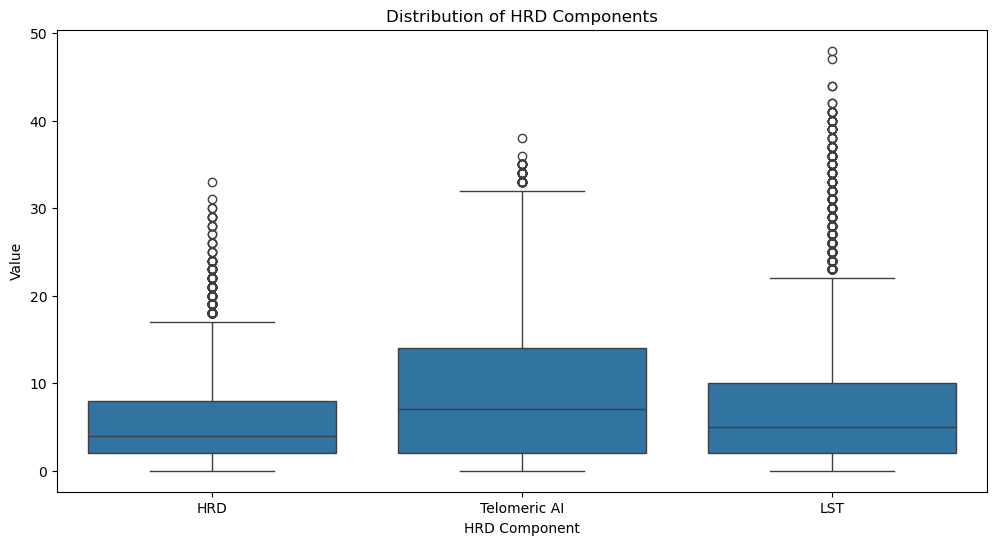

In [14]:

# 4. Box plot of HRD components
plt.figure(figsize=(12, 6))
hrd_data_melted = pd.melt(hrd_data, id_vars=['sample'], value_vars=['HRD', 'Telomeric AI', 'LST'])
sns.boxplot(x='variable', y='value', data=hrd_data_melted)
plt.title('Distribution of HRD Components')
plt.xlabel('HRD Component')
plt.ylabel('Value')
plt.show()


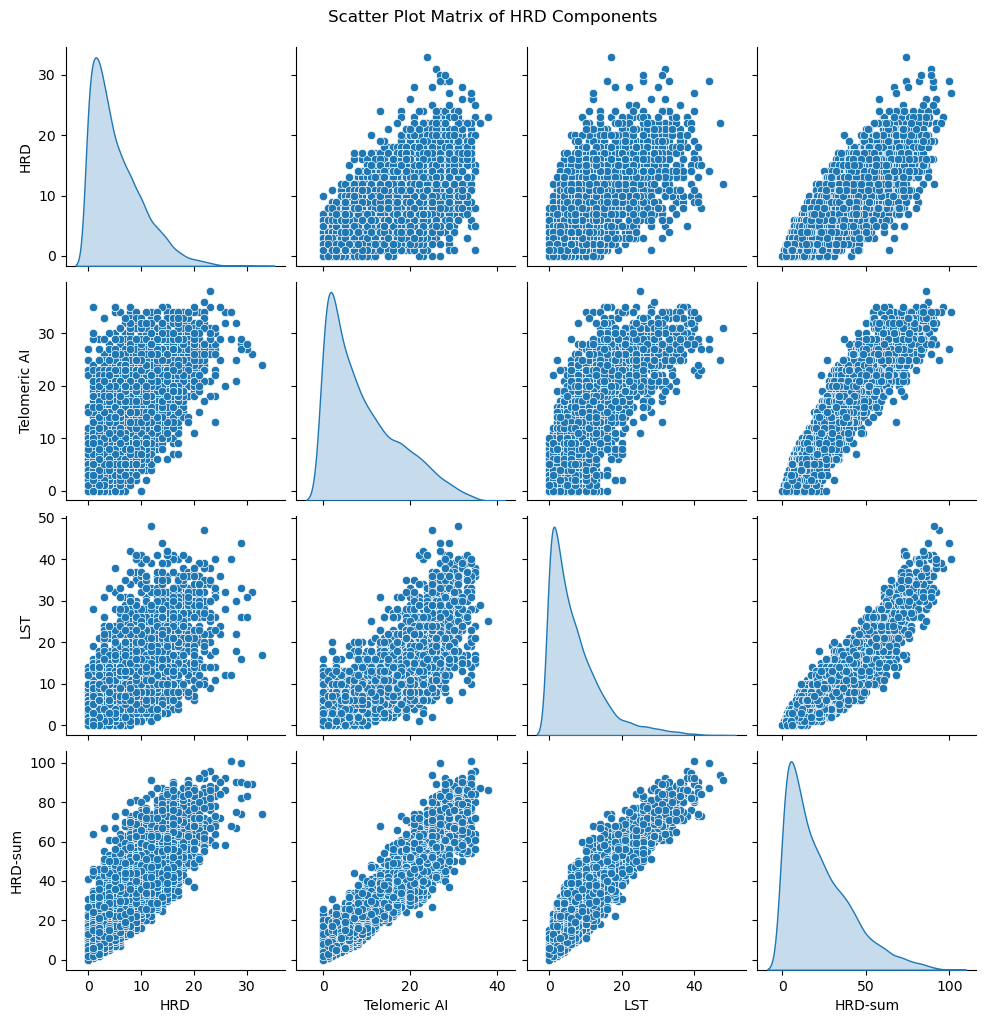

In [15]:

# 5. Scatter plot matrix of HRD components
sns.pairplot(hrd_data[hrd_components], diag_kind='kde')
plt.suptitle('Scatter Plot Matrix of HRD Components', y=1.02)
plt.show()

In [18]:
# Read the BRCA status data
brca_data = pd.read_csv('/Users/leojo/Developer/alexandrov_sd_proj/prelim_analysis/data/toga.breast.brca.status.txt', sep='\t')

# Display the first few rows of the dataset
print(brca_data.head())


     Unnamed: 0   BRCA1_somatic_null        BRCA1_germ_bi_allelic  \
0  TCGA.D8.A1XK                    0  germline.null_or_pathogenic   
1  TCGA.A1.A0SO  somatic.splice_site                            0   
2  TCGA.D8.A1XQ                    0  germline.null_or_pathogenic   
3  TCGA.BH.A0BZ                    0                            0   
4  TCGA.A8.A08R                    0                            0   

  BRCA1_germ_mono_allelic BRCA1_deletion BRCA1_epigenetic_silencing  \
0                       0              0                          0   
1                       0              0                          0   
2                       0              0                          0   
3                       0              0                          0   
4                       0              0                          0   

  BRCA1_mRNA BRCA2_somatic_null        BRCA2_germ_bi_allelic  \
0          0                  0                            0   
1          0                  

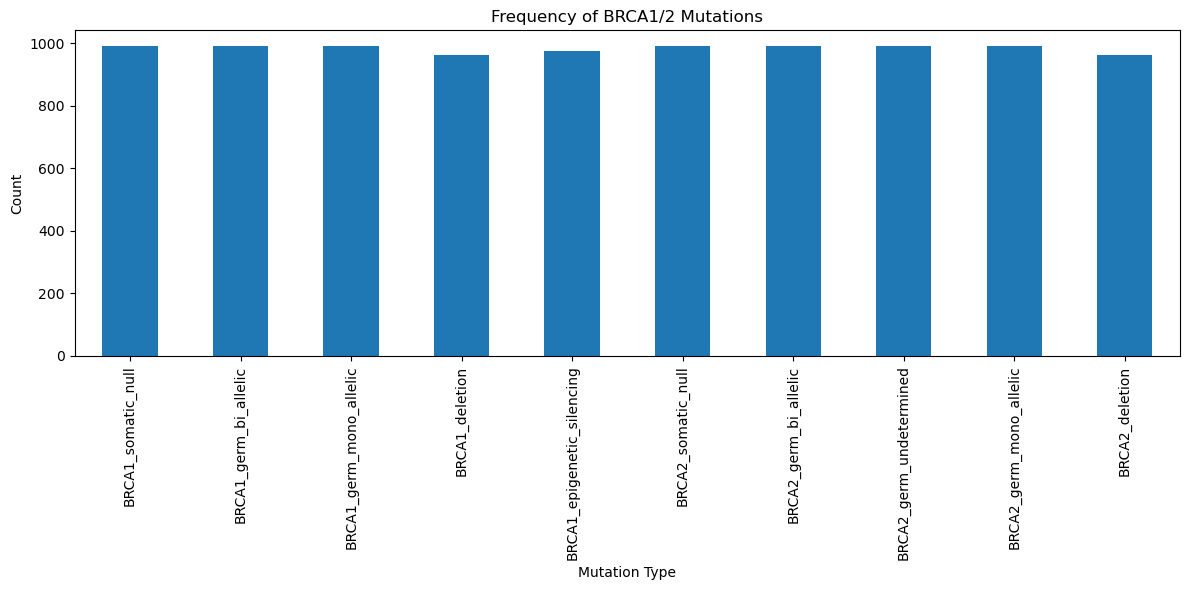

In [28]:
# 6. Bar plot of BRCA1/2 mutation frequencies
mutation_columns = ['BRCA1_somatic_null', 'BRCA1_germ_bi_allelic', 'BRCA1_germ_mono_allelic', 'BRCA1_deletion', 'BRCA1_epigenetic_silencing',
                    'BRCA2_somatic_null', 'BRCA2_germ_bi_allelic', 'BRCA2_germ_undetermined', 'BRCA2_germ_mono_allelic', 'BRCA2_deletion']

# Count non-zero and non-empty values
mutation_counts = brca_data[mutation_columns].apply(lambda x: (x != 0) & (x != '') & (x.notna())).sum()

plt.figure(figsize=(12, 6))
mutation_counts.plot(kind='bar')
plt.title('Frequency of BRCA1/2 Mutations')
plt.xlabel('Mutation Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

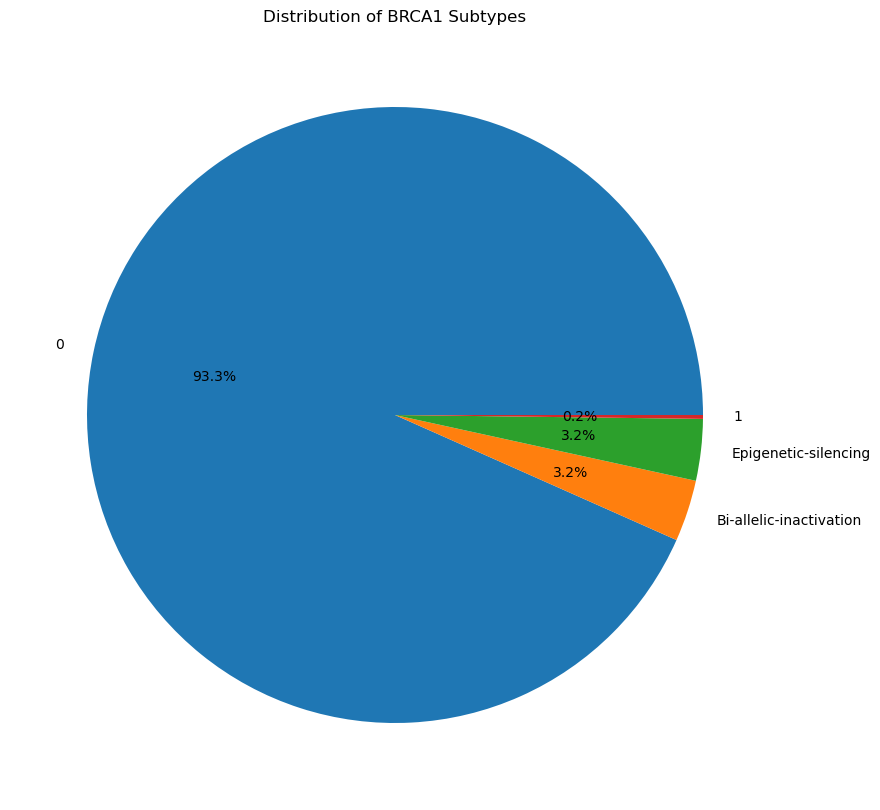

In [25]:

# 7. Pie chart of PAM50 subtypes
plt.figure(figsize=(10, 10))
brca_data['event.BRCA1'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of BRCA1 Subtypes')
plt.ylabel('')
plt.show()


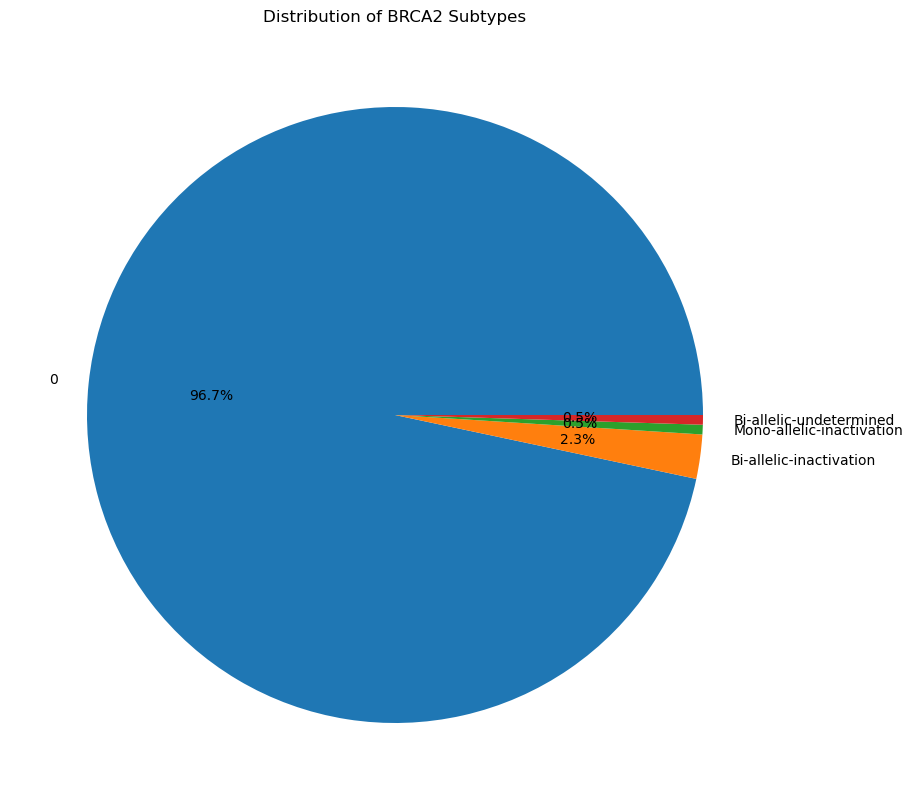

In [27]:

# 7. Pie chart of PAM50 subtypes
plt.figure(figsize=(10, 10))
brca_data['event.BRCA2'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of BRCA2 Subtypes')
plt.ylabel('')
plt.show()


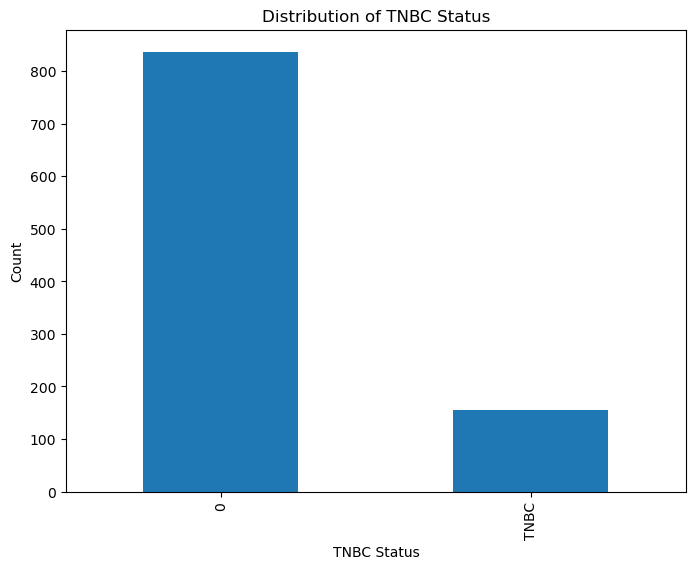

In [21]:

# 8. Bar plot of TNBC status
plt.figure(figsize=(8, 6))
brca_data['event.TNBC'].value_counts().plot(kind='bar')
plt.title('Distribution of TNBC Status')
plt.xlabel('TNBC Status')
plt.ylabel('Count')
plt.show()


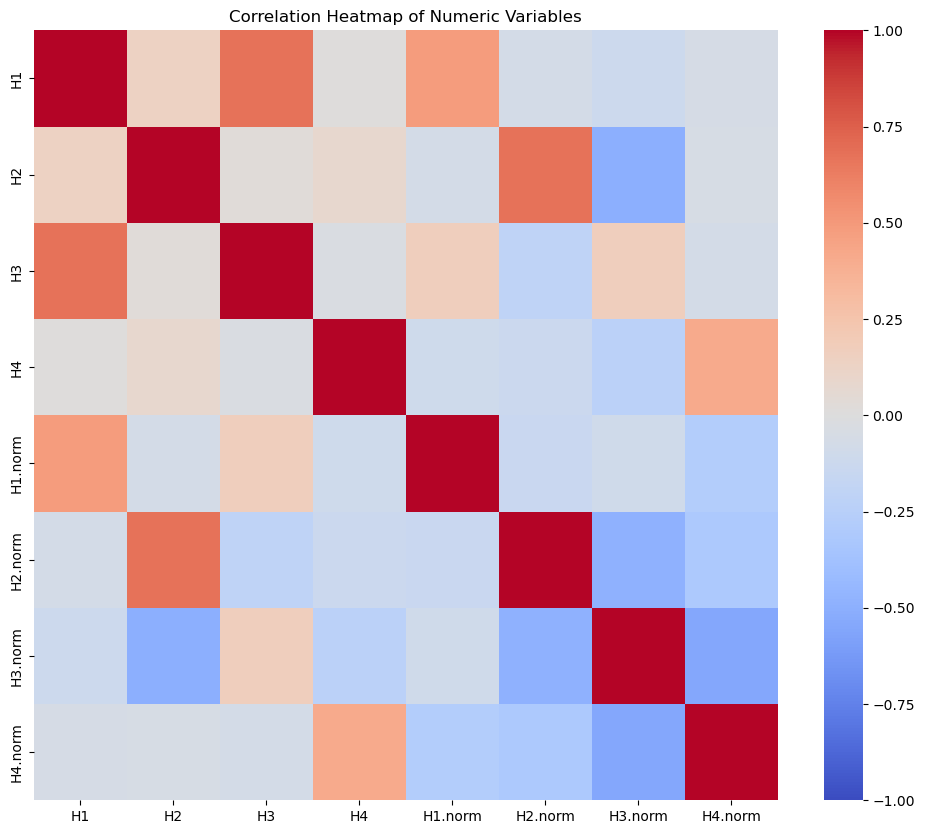

In [22]:

# 9. Heatmap of correlations between numeric columns
numeric_columns = brca_data.select_dtypes(include=[np.number]).columns
correlation_matrix = brca_data[numeric_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()


/var/folders/tx/vgccmrkj1fz1zv99j496_3k80000gn/T/ipykernel_20770/3904622901.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  event_data = brca_data[event_columns].apply(pd.value_counts).fillna(0)
/var/folders/tx/vgccmrkj1fz1zv99j496_3k80000gn/T/ipykernel_20770/3904622901.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  event_data = brca_data[event_columns].apply(pd.value_counts).fillna(0)
/var/folders/tx/vgccmrkj1fz1zv99j496_3k80000gn/T/ipykernel_20770/3904622901.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  event_data = brca_data[event_columns].apply(pd.value_counts).fillna(0)
/var/folders/tx/vgccmrkj1fz1zv99j496_3k80000gn/T/ipykernel_20770/3904622901.py:3: FutureWarning: pandas.value_counts is deprecated and w

<Figure size 1200x600 with 0 Axes>

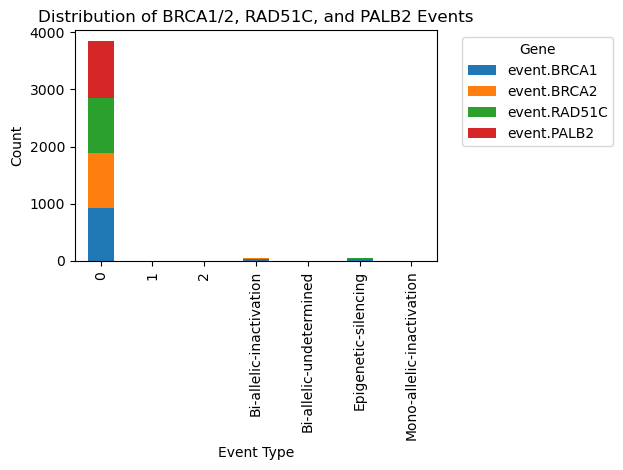

In [23]:

# 10. Stacked bar plot of BRCA1/2 events
event_columns = ['event.BRCA1', 'event.BRCA2', 'event.RAD51C', 'event.PALB2']
event_data = brca_data[event_columns].apply(pd.value_counts).fillna(0)

plt.figure(figsize=(12, 6))
event_data.plot(kind='bar', stacked=True)
plt.title('Distribution of BRCA1/2, RAD51C, and PALB2 Events')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.legend(title='Gene', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()